# unclusteredRSD-clusteredRSD

In [13]:
source1=1
source2=4

In [14]:
from CoLoRe_corrf_analysis.plot_methods import Plots
from CoLoRe_corrf_analysis.file_funcs import FileFuncs
from CoLoRe_corrf_analysis.fitter import Fitter
from CoLoRe_corrf_analysis.read_colore import ComputeModelsCoLoRe

In [15]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

We need to provide the following files to the theory object:

In [16]:
theory_path=Path('/global/cscratch1/sd/damonge/CoLoRe_sims/sim1000')
bias_filename=Path('/global/cscratch1/sd/cramirez/NBodyKit/hanyu_david_box/input_files/BzBlue.txt')
nz_filename=Path('/global/cscratch1/sd/cramirez/NBodyKit/hanyu_david_box/input_files/NzBlue.txt')
pk_filename=Path('/global/cscratch1/sd/cramirez/NBodyKit/hanyu_david_box/input_files/Pk_CAMB_test.dat')

Create theory object:

In [17]:
theory = ComputeModelsCoLoRe(
    box_path=theory_path,
    source=2,
    nz_filename=nz_filename,
    pk_filename=pk_filename,
    param_cfg_filename='/global/cscratch1/sd/damonge/CoLoRe_sims/sim1000/out_params.cfg',
    bias_filename=bias_filename,
    apply_lognormal=True)

In [22]:
print(FileFuncs.get_available_runs(f'/global/cscratch1/sd/cramirez/NBodyKit/cross_correlations/multibias/s{source1}_s{source2}_from_CoLoRe'))

+-------+-----------+------+------+--------+------+------+----+
| nside |    rsd    | rmin | rmax | N_bins | zmin | zmax | N  |
+-------+-----------+------+------+--------+------+------+----+
|   2   | rsd_norsd | 0.1  | 200  |   41   | 0.5  | 0.7  | 0  |
|   2   |  rsd_rsd  | 0.1  | 200  |   41   | 0.5  | 0.7  | 46 |
+-------+-----------+------+------+--------+------+------+----+


Expected model:

$$P_0(k) = \frac{f}{3} \left(r_{\rm A} <\delta_{\rm LN}^{\rm b_B}\delta_{\rm L}>\right)$$

$$P_2(k) = \frac{2 f}{3} \left( r_{\rm A} <\delta_{\rm LN}^{\rm b_B}\delta_{\rm L}>\right)$$

In [23]:
boxes_path=Path(f'/global/cscratch1/sd/cramirez/NBodyKit/cross_correlations/multibias/s{source1}_s{source2}_from_CoLoRe/')

zmin=0.5
zmax=0.7
rsd=True
rsd2=True

sub_boxes = FileFuncs.mix_sims(
    FileFuncs.get_full_path(boxes_path,
                            rsd=rsd, rsd2=rsd2, #Must specify here rsd2 
                            rmin=0.1, rmax=200, N_bins=41,
                            zmin=zmin, zmax=zmax, #Also results for 0.7 and 0.9
                            nside=2)
)
z = theory.get_zeff(zmin=zmin, zmax=zmax) #
print('zeff: ', z)
bias = 0.01
print('input bias 1: ', bias)
bias2 = 1
print('input bias 2: ', bias2)

zeff:  0.5990093404246088
input bias 1:  0.01
input bias 2:  1


In [24]:
len(sub_boxes)

46

/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/mcfit/mcfit.py:126: UserWarning: The default value of lowring has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of lowring has been changed to False, "
/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/mcfit/mcfit.py:217: UserWarning: The default value of extrap has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of extrap has been changed to False, "
/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/mcfit/mcfit.py:126: UserWarning: The default value of lowring has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of lowring has been changed to False, "
/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-package

Text(0.5, 1.0, 'Bias2 = 2')

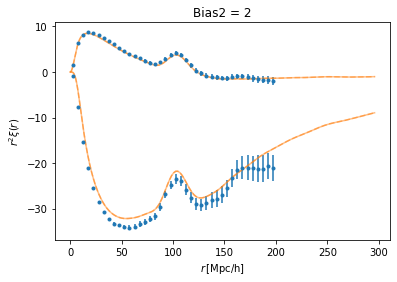

In [25]:
fig, ax = plt.subplots()
pole=2
Plots.plot_data(pole, sub_boxes, ax=ax, plot_args=dict(c='C0'))
Plots.plot_theory(pole, z=z, theory=theory, ax=ax, bias=bias, bias2=bias2, rsd=rsd, rsd2=rsd2, plot_args=dict(alpha=0.5, c='C1'))
pole=0
Plots.plot_data(pole, sub_boxes, ax=ax, plot_args=dict(c='C0'))
Plots.plot_theory(pole, z=z, theory=theory, ax=ax, bias=bias, bias2=bias2, rsd=rsd, rsd2=rsd2, plot_args=dict(alpha=0.5, c='C1'))
ax.set_title('Bias2 = 2')

In [26]:
fitter = Fitter(boxes=sub_boxes, z=z, theory=theory, poles=[0, 2], rsd=rsd, rsd2=rsd2,
                bias0=bias, bias20=bias2, smooth_factor0=1, smooth_factor_rsd0=1, smooth_factor_cross0=1)

fitter.run_fit(free_params=['bias', 'bias2'])

/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/mcfit/mcfit.py:126: UserWarning: The default value of lowring has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of lowring has been changed to False, "
/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/mcfit/mcfit.py:217: UserWarning: The default value of extrap has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of extrap has been changed to False, "


/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/mcfit/mcfit.py:126: UserWarning: The default value of lowring has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of lowring has been changed to False, "
/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/mcfit/mcfit.py:217: UserWarning: The default value of extrap has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of extrap has been changed to False, "


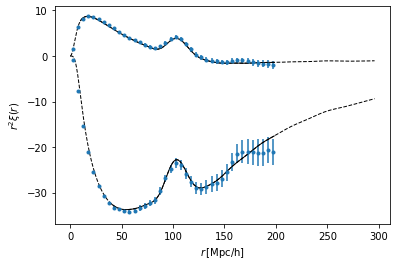

In [27]:
fig, ax = plt.subplots()
pole=2

Plots.plot_data(pole=pole, boxes=sub_boxes, ax=ax, plot_args=dict(c='C0', label='data'))
Plots.plot_best_fit(fitter=fitter, pole=pole, ax=ax, plot_args=dict(c='k', lw=1, label='best fit'))

pole=0

Plots.plot_data(pole=pole, boxes=sub_boxes, ax=ax, plot_args=dict(c='C0', label='data'))
Plots.plot_best_fit(fitter=fitter, pole=pole, ax=ax, plot_args=dict(c='k', lw=1, label='best fit'))